# Segundo Avance del PIA
* **Equipo:** 3
* **Grupo:** 003 (Lunes 18-21)
* **Integrantes:**
    * 1860533 De León Flores Jennifer Priscila
    * 1858788 Gallegos Luna Enrique Alejandro
    * 1860043 Rodríguez Morales Mario Alberto
    * 1862717 Ruiz Ramirez Luis Angel

## Base de datos
* **Nombre:** U.S. Gasoline and Diesel Retail Prices 1995-2021
* **URL:** https://www.kaggle.com/mruanova/us-gasoline-and-diesel-retail-prices-19952021

### Descripción de los datos
Como mencionamos en el primer avance del PIA, los datos son los siguientes:
* **Tipo de datos:** Tabla con precios históricos.
* **Descripción de las columnas:** Nuestra base de datos cuenta que 14 columnas:
    * **Date:** Esta columna cuenta con datos del tipo fecha, las cuales van del 02 de enero de 1995 al 25 de enero de 2021.
    * **A1, A2, A3, R1, R2, R3, M1, M2, M3, P1, P2, P3, D1:** Estas 13 columnas cuentan con datos numéricos del tipo flotante, los cuales son precios promedio semanales de varios tipos de gasolina en los Estados Unidos. Los tipos de gasolina son: All Grades (todos los tipos en conjunto), Regular (mejor conocida en México como "Gasolina Roja"), Premium (conocida como "Gasolina Verde") y Diesel (conocida como "Gasolina para camiones" o "Gasolina Negra").

In [2]:
import pandas as pd
import numpy as np
import json
df=pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv")
print(df['A1'].count())

1361


Como podemos ver tenemos 1361 datos por columna (ya que no se cuenta la fila de títulos), por lo que en total tenemos 1361 fechas y en total tenemos 17,693 precios, de los cuales unicamente utilizaremos 6,805. La razón por la cual descartamos 10,888 precios se explicará más adelante en la sección de **limpieza de datos**, la cual está después de las preguntas de interés.

### Justificación del uso de datos
* **¿Porqué trabajar con ellos?** Como equipo, nos interesa trabajar con estos datos dado que el precio de la gasolina es muy volátil y suele subir o bajar de forma repentina. Con este conjunto de datos podremos observar e investigar acerca de la tendencia de los datos, para que en conjunto con la investigación sea más fácil conocer los factores o acontecimientos que han afectado el precio de los diferentes tipos de gasolina, así como en base a precios históricos predecir el comportamiento del precio en el futuro.
* **¿Cuál es el beneficio de trabajar en estos datos?** Como mencionamos, al intentar predecir el precio en el futuro en base a precios históricos, podremos dar a conocer a las personas que tienen automóviles o camiones cuando será el momento para llenar al completo su tanque dado que será un precio más bajo.

### Objetivos
* **Objetivo principal:** Realizar un modelo para pronosticar los precios en cualquier momento del tiempo, si estos siguieran una tendencia como hasta ahora sin afectaciones externas (ya sea la llegada de otra pandemia, atentados terroristas, crisis económicas entre otras cosas.) 
* **Objetivo secundario:** Conocer los acontecimientos históricos que afectaron el precio de los diversos tipos de gasolina entre el 02 de enero de 1995 y el 25 de enero de 2021, ya sea ubicando donde se encuentran precios mínimos o máximos de las gasolinas en conjunto o de un solo tipo de estas. Comparando además los precios de la gasolina menos común de usar (Diesel) con la más común (Regular, gasolina verde en México)

### Preguntas de interés
* ¿Afectó la pandemia del COVID-19 al precio de la gasolina?
* Si el COVID-19 afectó al precio, ¿el precio fue a la alza o a la baja?
* ¿Los cambios de presidente afectaron al precio de la gasolina?
* ¿Afectó el 11S al precio de la gasolina?

### Limpieza de datos
Importamos nuestra base de datos la cual lleva por nombre *PET_PRI_GND_DCUS_NUS_W.csv* cuyos datos sin manipulación son los siguientes:

In [3]:
print("Los datos sin manipulación son:")
print(df)

Los datos sin manipulación son:
            Date     A1     A2     A3     R1     R2     R3     M1     M2  \
0     01/02/1995  1.127  1.104  1.231  1.079  1.063  1.167  1.170  1.159   
1     01/09/1995  1.134  1.111  1.232  1.086  1.070  1.169  1.177  1.164   
2     01/16/1995  1.126  1.102  1.231  1.078  1.062  1.169  1.168  1.155   
3     01/23/1995  1.132  1.110  1.226  1.083  1.068  1.165  1.177  1.165   
4     01/30/1995  1.131  1.109  1.221  1.083  1.068  1.162  1.176  1.163   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
1356  12/28/2020  2.330  2.225  2.535  2.243  2.158  2.423  2.634  2.482   
1357  01/04/2021  2.336  2.227  2.549  2.249  2.160  2.437  2.639  2.484   
1358  01/11/2021  2.403  2.298  2.610  2.317  2.232  2.498  2.702  2.550   
1359  01/18/2021  2.464  2.351  2.688  2.379  2.285  2.579  2.759  2.601   
1360  01/25/2021  2.478  2.363  2.703  2.392  2.298  2.593  2.776  2.615   

         M3     P1     P2     P3     D1  
0     1.298  

Como nos enfocaremos en los precios promedio según su nivel de octanaje no si su fórmula es convencional o reformulada, además incluiremos si es Premium o Diesel, eliminamos el resto de las columnas, ya que estas tienen el precio según si son gasolinas convencionales o reformuladas, en las cuales el nivel de octanaje no importa. Las columnas que nos interesan las renombraremos para una más fácil identificación, por lo cual nuestra base de datos a trabajar es la siguiente:

In [4]:
df.rename(columns={'A1':'All Grades','R1':'Regular','M1':'Midgraded','P1':'Premium','D1':'Diesel'},inplace=True)
cf=df.drop(['A2','A3','R2','R3','M2','M3','P2','P3'],axis=1) #Guardando la base que necesitamos en otra variable
print(cf)

            Date  All Grades  Regular  Midgraded  Premium  Diesel
0     01/02/1995       1.127    1.079      1.170    1.272   1.104
1     01/09/1995       1.134    1.086      1.177    1.279   1.102
2     01/16/1995       1.126    1.078      1.168    1.271   1.100
3     01/23/1995       1.132    1.083      1.177    1.277   1.095
4     01/30/1995       1.131    1.083      1.176    1.275   1.090
...          ...         ...      ...        ...      ...     ...
1356  12/28/2020       2.330    2.243      2.634    2.889   2.635
1357  01/04/2021       2.336    2.249      2.639    2.895   2.640
1358  01/11/2021       2.403    2.317      2.702    2.959   2.670
1359  01/18/2021       2.464    2.379      2.759    3.014   2.696
1360  01/25/2021       2.478    2.392      2.776    3.033   2.716

[1361 rows x 6 columns]


Nuestra base de datos no cuenta con datos nulos:

In [5]:
cf.isnull().sum()

Date          0
All Grades    0
Regular       0
Midgraded     0
Premium       0
Diesel        0
dtype: int64

Creando la nueva base de datos con los datos que necesitamos únicamente, la guardamos bajo el nombre *DatosNuevosGasolina.csv*:

In [6]:
cf.to_csv("DatosNuevosGasolina.csv",index=False)

### Estadística básica
Como nos interesan los precios máximos y mínimos, podemos encontrar con herramientas descriptivas los precios históricos mínimos y máximos de cada una de los tipos, aunque un precio mínimo no nos diría mucho ya que puede que sea el primer registro de precios que se tiene, un precio máximo si lo hará.

In [7]:
print("En All Grades, el precio máximo es de: ",cf['All Grades'].max()," y el precio mínimo es: ",cf['All Grades'].min())
print("En Regular, el precio máximo es de: ",cf['Regular'].max()," y el precio mínimo es: ",cf['Regular'].min())
print("En Midgraded, el precio máximo es de: ",cf['Midgraded'].max()," y el precio mínimo es: ",cf['Midgraded'].min())
print("En Premium, el precio máximo es de: ",cf['Premium'].max()," y el precio mínimo es: ",cf['Premium'].min())
print("En Diesel, el precio máximo es de: ",cf['Diesel'].max()," y el precio mínimo es: ",cf['Diesel'].min())

En All Grades, el precio máximo es de:  4.165  y el precio mínimo es:  0.9490000000000001
En Regular, el precio máximo es de:  4.114  y el precio mínimo es:  0.907
En Midgraded, el precio máximo es de:  4.229  y el precio mínimo es:  1.008
En Premium, el precio máximo es de:  4.343999999999999  y el precio mínimo es:  1.1
En Diesel, el precio máximo es de:  4.763999999999999  y el precio mínimo es:  0.953


Como podemos ver, los precios precios máximos son similares, más adelante veremos en un gráfico si estos máximos se dan en las mismas fechas o no. También calcularemos la correlación de los datos, para ver que tan relacionados entre sí están, ya que esto podría sernos de ayuda si utilizamos nuestro objetivo principal que es de predecir precios.

In [8]:
print("La correlación es:\n")
cf.corr()

La correlación es:



,All Grades,Regular,Midgraded,Premium,Diesel
All Grades,1.000000,0.999690,0.996211,0.990455,0.984298
Regular,0.999690,1.000000,0.994383,0.987353,0.982596
Midgraded,0.996211,0.994383,1.000000,0.998481,0.986761
Premium,0.990455,0.987353,0.998481,1.000000,0.984871
Diesel,0.984298,0.982596,0.986761,0.984871,1.000000


Como podemos ver, la correlación entre ellas es muy grande.

### Parte gráfica
Comenzaremos graficando los 4 tipos y sus precios promedios (All Grades) para ver un poco como se comportan los precios y ver sus subidas o bajadas de precio ocurren en todas al mismo tiempo o si es solamente un tipo de gasolina el que lo hace. Lo veremos con ayuda de un Stacked Plot:

<AxesSubplot:>

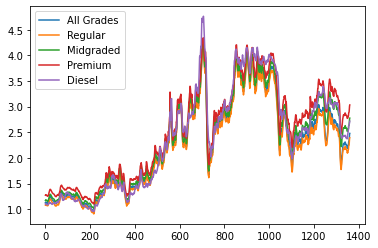

In [9]:
cf.plot.line()

Lo precios se comportan de manera similar, pero el Diesel tiene un pico mayor y después una gran caída alrededor de la semana 680. Esta semana se ubica aproximandamente en el año 2008 y podemos ver que en la semana 1300 aproximadamente igual se produce una bajada, pero la gasolina Premium no se ve afectada. Veremos primero un gráfico de línea de la gasolina Diesel para ver el comportamiento del precio individualmente y ver en que precios en dólares ha oscilado. Además de lo mencionado, se confirma que un mínimo no nos dice mucho (como lo dijimos en la parte descriptiva), ya que se puede que en los 90's la gasolina era más barata.

<AxesSubplot:>

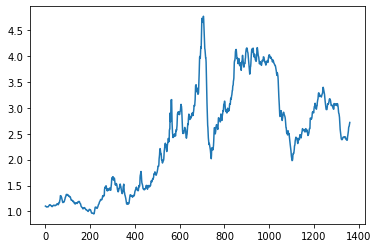

In [13]:
cf['Diesel'].plot.line()

Como podemos ver si se comporta al igual que en la otras gasolinas, aunque ya es bien conocido que el Diesel es una gasolina más costosa dado que es para camiones (traileres, camiones de carga y autobuses), y su precio máximo se ubica arriba de los 4.5 USD. Ahora bien, la gasolina más común es la gasolina regular (mejor conocida en México como la gasolina verde), pero, ¿cómo se comportan los precios de esta? Lo veremos en el siguiente gráfico.

<AxesSubplot:>

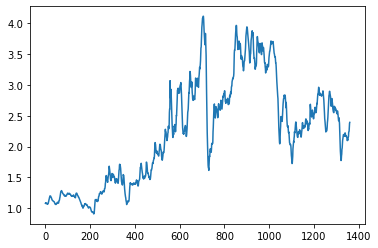

In [32]:
cf['Regular'].plot.line()

Al analizar ambos tipos de gasolina podemos confirmar que es verdad que la gasolina Diesel, es más cara y se dan subidas y bajadas de precio en acontecimientos históricos:
* **2002 - 2008:** Subidas de precios debido a que el dólar perdía el valor, en este periodo, el dólar perdió su valor en un 26%.
* **2008 - 2009:** Una enorme caída debido a la crisis económica que se vivió en ese año y 2009, posteriormente se recuperó. En 2008 se tuvieron los precios más altos que se tengan registrados entre enero de 1995 y enero de 2021. Como vimos en la parte descriptiva al obtener los máximos, el Diesel tuvo un costo de 4.76 USD por galón, siendo el precio más alto.
* **2012:** Se tenían constantes subidas y bajadas debido a que se temía acción militar entre Estados Unidos e Irán, así como el cierre de muchas refinerías en los Estados Unidos disminuía la producción.
* **2015:** El precio cayó debido a que creció la producción de petróleo en los Estados Unidos.
* **2018:** El precio cayó por distintas causas, entre ellas, el que Estados Unidos decidió retirarse del acuerdo nuclear con Irán, lo cual provocó que la producción de petróleo de Irán cayerá. Además de que Venezuela tuvo una producción limitada de Petróleo.
* **2020:** La pandemia de COVID-19 hizo caer los precios de la gasolina como se ve en estos 3 gráficos.

Ahora bien como se puede notar la gasolina regular, oscila en precios entre abajo de los 3.5 USD, aunque tiene momentos en que está más arriba de este precio, mientras que la gasolina del tipo Diesel siempre es más cara, por lo que en el siguiente gráfico veremos como se ha comportado la gasolina Regular junto con el Diesel:

<AxesSubplot:>

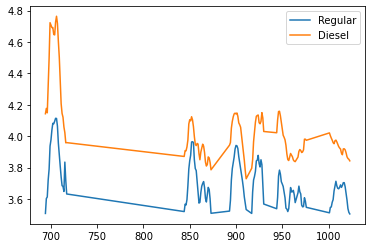

In [26]:
tf=cf.drop(['All Grades','Midgraded','Premium'],axis=1) 
tf[tf['Regular']>3.5].plot.line()

Una vez visto que los precios se comportan a manera similar, podemos ver que fue en un rango de fechas las cuales se encuentran entre el lunes 26 de mayo de 2008 y el lunes 08 de septiembre de 2014, fue donde el precio estuvo por arriba de los 3.5 USD por galón, como explicamos arriba, esto se debió a la crisis de 2008-2009, teniendo también notoriamente las mencionadas subidas y bajadas durante el año 2012. Ahora visualizando por último, los precios de la gasolina Premium (conocida en México como gasolina roja) ya que entre 2018 y 2020 es la que tuvo precios más altos y nos interesa observar individualmente por encima de que precios estuvo este tipo de gasolina durante estos años, por lo cual construiremos un gráfico de línea únicamente con los precios de las últimas 160 semanas, es decir, entre el 01 de enero de 2018 y el 25 de enero de 2021:

<AxesSubplot:>

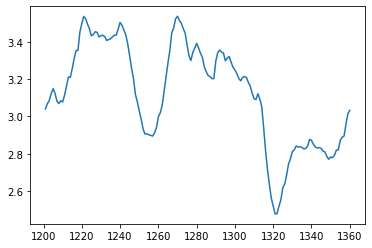

In [24]:
cf['Premium'].tail(160).plot.line()

Como se ve tuvo un pico aproximadamente el 06 de mayo de 2019, aunque luego comenzó a caer, hasta caer a un precio mínimo aproximadamente el 20 de abril de 2020, aunque dicha caída como se puede ver que inicia el gran declive cerca del 10 de febrero de 2020, con la llegada de los primeros casos de COVID-19 al continente Americano. Ahora como vimos que se generó este mínimo, veremos en gráfico todas las gasolinas durante las últimas 55 semanas, este periodo abarca del 06 de enero de 2020 al 25 de enero de 2021, durante el periodo pandemico:

<AxesSubplot:>

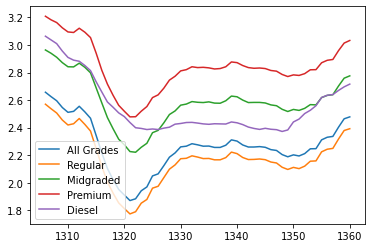

In [25]:
cf.tail(55).plot.line()

Todas ellas presentan las mismas caídas de precios en las mismas, y se ha recuperado en las últimas 10 semanas, que es aproximadamente a partir del 16 de noviembre de 2020, hasta el 25 de enero de 2021, que es el último registro que tiene nuestra base de datos. 

Ahora bien, con estos gráficos que vimos podemos contestar las **preguntas de interés** que planteamos desde el primer avance del PIA, las cuales, con sus respectivas respuestas son las siguientes:

* ¿Afectó la pandemia del COVID-19 al precio de la gasolina?
    * Sí, como se vio en gráficos, aproximadamente el 10 de febrero de 2020 el precio de la gasolina comenzó a caer hasta alcanzar un mínimo aproxidamente el lunes 20 de abril de 2020.
* Si el COVID-19 afectó al precio, ¿el precio fue a la alza o a la baja?
    * Como se mencionó en la respuesta anterior fue a la baja al comienzo y hasta la semana del 20 de abril de 2020, a partir del lunes 27 de abril el precio se ha ido recuperando, aunque al 25 de enero 2021 aunque no recupera los precios que tenía antes de la pandemia.
* ¿Los cambios de presidente afectaron al precio de la gasolina?
    * No lo hacen, como se puede ver en el este último gráfico, los precios de la gasolina subieron en 2020, pero no fue por las elecciones que lo hicieron ya que esto ocurrió después de estas y en ningún año electoral se tienen subidas o bajadas de precios a causa de esto.
* ¿Afectó el 11S al precio de la gasolina?
    * Para responder la siguiente pregunta analizaremos los precios durante el mes de septiembre de 2001 en el siguiente gráfico:

<AxesSubplot:>

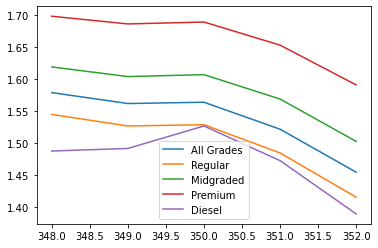

In [28]:
cf[348:353].plot.line()

Entre la semana 350 y 351 ocurrió el atentado del 11S, ya que la semana 350 tiene el precio al lunes 10 de septiembre de 2001 y como se puede ver, entre el 10 y el 24 de septiembre de 2001 el precio a la baja, por lo que si nos guiaramos en nuestro gráfico podríamos afirmar que el 11S sí afectó los precios de la gasolina.

En cuanto a nuestros **objetivos** podemos decir lo siguiente sobre ellos:
* **Objetivo principal:** No podemos afirmar nada sobre este aún, ya que en este avance no incluimos nada sobre series de tiempo o regresión lineal, aunque a simple vista podríamos decir que en base a la tendencia en las últimas 10 semanas y teniendo en cuenta la recuperación económica dada la avanzada vacunación en los Estados Unidos, los precios irán a la alza.
* **Objetivo secundario:** A lo largo de este informe nosotros platicamos sobre las principales afectaciones al precio de la gasolina, aunque en el siguiente gráfico mostramos los precios y sus picos entre enero de 2008 y junio de 2009, ya que mencionamos anteriormente a detalle la caída de precios durante el COVID-19, pero no la subida debido a la crisis económica del 2008:

<AxesSubplot:>

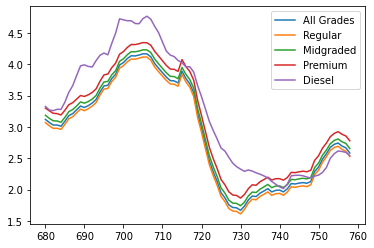

In [30]:
cf[680:759].plot.line()

Como podemos ver, los precios más altos se dieron aproximadamente entre abril y junio de 2008, teniendo una caída hacia finales de año, pero una recuperación durante el primer semestre de 2009.

Para cerrar con este informe, gracias a estos gráficos y con un poco de información de una página web, pudimos responder las preguntas de interés que nos planteamos nos daban curiosidad sobre este tema, así como visualizar donde hubo cambios más notorios en el precio.Más adelante nos gustaría realizar con ayuda de series de tiempo o regresión lineal, una predicción al menos para el primer semestre de 2021 sobre los precios de la gasolina en los Estados Unidos, para poder cumplir así con nuestro objetivo principal que es el que como equipo más nos interesa.

Fuente sobre información de los cambios en precios de la gasolina (en inglés): https://www.thebalance.com/why-are-gas-prices-so-high-3305653#:~:text=Mississippi%20River%20floods.-,2012,increased%20demand%20during%20the%20summer.